#### Importing Libraries and File Reading

In [3]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
# for visualisation
import matplotlib.pyplot as plt
# for candlestick chart plotting
import mplfinance as mpf
# for heatmap
import seaborn as sns

In [4]:
# configurations for pandas display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_seq_items = None
pd.set_option('max_colwidth', None)

# Disable all warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.9 MB/s eta 0:00:00


## 6. Further Analysis

In [9]:
gold_price = pd.read_csv('processed_price_gold.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [12]:
gold_price.head(10)

,GOLD_open,GOLD_high,GOLD_low,GOLD_close,GOLD_ajclose,GOLD_volume,EG_open,EG_high,EG_low,EG_close,EG_ajclose,EG_volume,GDX_open,GDX_high,GDX_low,GDX_close,GDX_ajclose,GDX_volume,PLT_price,PLT_open,PLT_high,PLT_low,PLT_trend,SF_price,SF_open,SF_high,SF_low,SF_volume,SF_trend,PLD_price,PLD_open,PLD_high,PLD_low,PLD_trend,RHO_price,SP_open,SP_high,SP_low,SP_close,SP_ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_ajclose,DJ_volume,EU_price,EU_open,EU_high,EU_low,EU_trend,USDI_price,USDI_open,USDI_high,USDI_low,USDI_volume,USDI_trend,OF_price,OF_open,OF_high,OF_low,OF_volume,OF_trend,OS_price,OS_open,OS_high,OS_low,OS_trend,USO_open,USO_high,USO_low,USO_close,USO_ajclose,USO_volume,USB_price,USB_open,USB_high,USB_low,USB_trend
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,74.550003,76.150002,72.150002,72.900002,70.431755,787900,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,1414.65,1420.30,1423.35,1376.85,0,53604,54248,54248,52316,119440,1,618.85,614.70,615.00,614.60,1,1425.0,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,1.3018,1.2982,1.3051,1.2957,1,80.341,80.565,80.630,80.130,22850,0,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,1.911,1.911,1.911,1.911,1
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,73.599998,75.099998,73.349998,74.900002,72.364037,896600,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,1420.25,1414.75,1431.75,1400.70,1,53458,53650,54030,52890,65390,0,623.65,622.60,623.45,622.30,1,1400.0,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,1.3035,1.3020,1.3087,1.2997,1,80.249,80.175,80.395,79.935,13150,0,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,1.851,1.851,1.851,1.851,0
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,1411.10,1422.65,1427.60,1404.60,0,52961,53400,53400,52544,67280,0,608.80,626.00,630.00,608.60,0,1400.0,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,1.2995,1.3043,1.3044,1.2981,0,80.207,80.300,80.470,80.125,970,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,1.810,1.810,1.810,1.810,0
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,66.449997,68.099998,66.000000,67.000000,64.731514,875300,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,1434.75,1408.95,1436.55,1408.15,1,53487,52795,53575,52595,55130,1,626.65,622.45,622.45,622.45,1,1400.0,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,1.3079,1.3003,1.3133,1.2994,1,80.273,80.890,80.940,80.035,22950,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,1.927,1.927,1.927,1.927,1
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,67.099998,69.400002,66.900002,68.500000,66.180725,837600,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,1429.05,1434.40,1453.75,1417.65,0,53148,53519,54184,52937,75950,0,635.90,625.70,641.50,623.80,1,1400.0,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,1.3045,1.3079,1.3197,1.3024,0,80.350,80.105,80.445,79.550,24140,1,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,37.669998,38.240002,37.520000,38.110001,38.110001,1

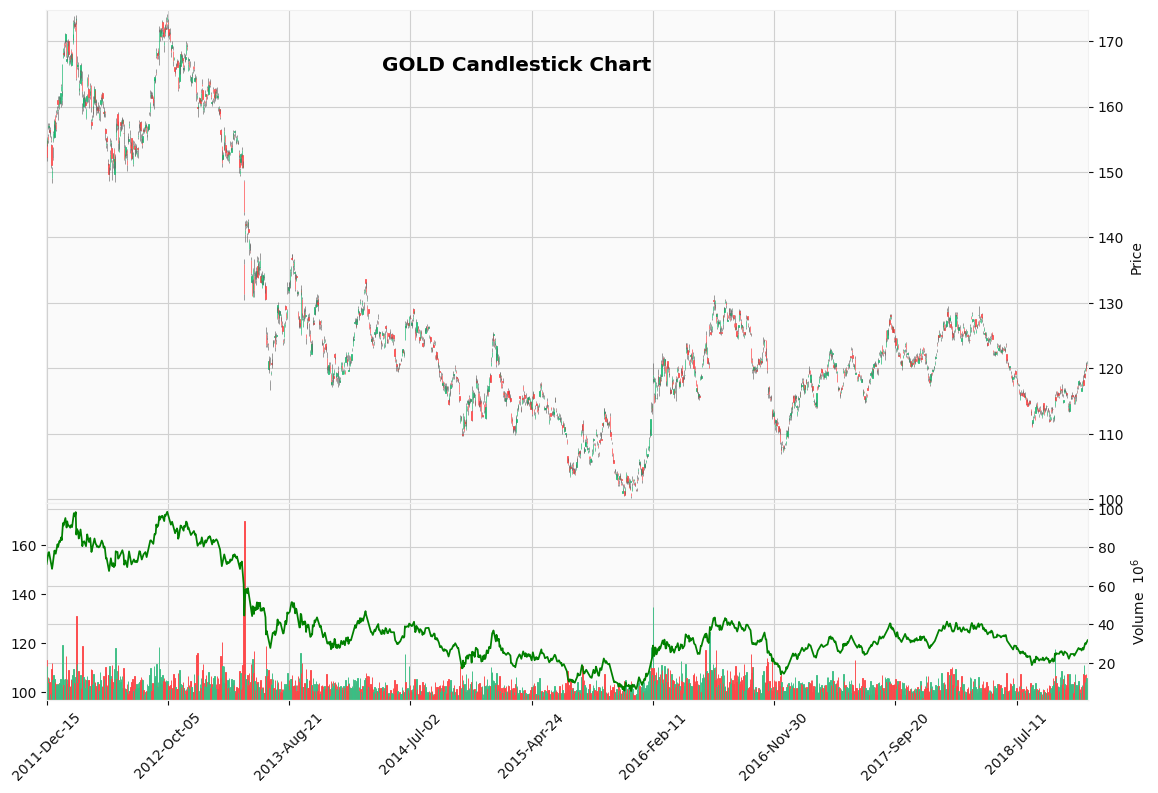

In [14]:
# Define the columns to plot
gold_columns = ['GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_ajclose', 'GOLD_volume']

gold_plot = gold_price[gold_columns]

# Rename the columns to match default column names
gold_plot.rename(columns={
    'GOLD_open': 'Open',
    'GOLD_high': 'High',
    'GOLD_low': 'Low',
    'GOLD_ajclose': 'Close',
    'GOLD_volume': 'Volume'
}, inplace=True)

# Plot the candlestick chart
mpf.plot(gold_plot, type='candle', title='GOLD Candlestick Chart', style='yahoo', volume=True, ylabel='Price',
         addplot=[mpf.make_addplot(gold_plot['Close'], panel=1, color='g', secondary_y=True)],
         figratio=(10, 6), figsize=(12, 8), tight_layout=True)

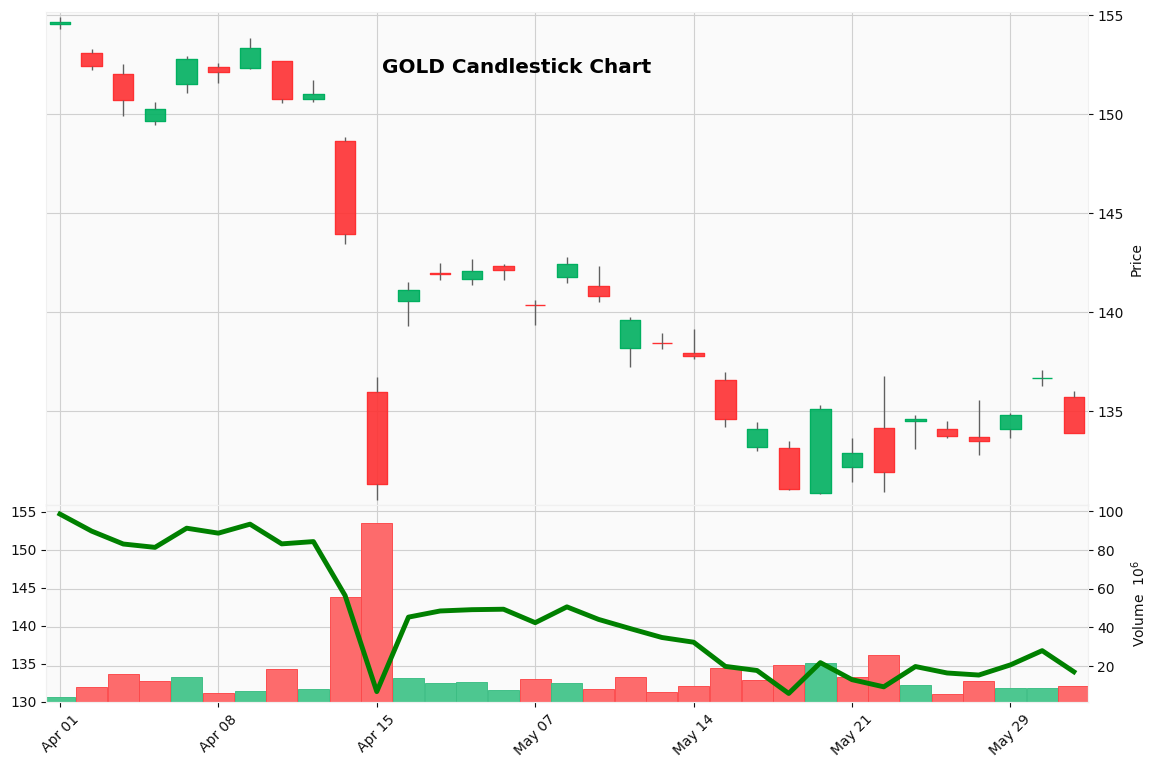

In [16]:
# Filter the DataFrame to include only the desired date range
start_date = '2013-03-31'
end_date = '2013-05-31'
gold_plot_filtered = gold_plot[(gold_plot.index >= start_date) 
                               & (gold_plot.index <= end_date)]

# Plot the candlestick chart with the filtered DataFrame
mpf.plot(gold_plot_filtered, type='candle', title='GOLD Candlestick Chart', style='yahoo', volume=True, ylabel='Price',
         addplot=[mpf.make_addplot(gold_plot_filtered['Close'], panel=1, color='g', secondary_y=True)],
         figratio=(10, 6), figsize=(12, 8), tight_layout=True)